In [ ]:
! pip install plotly
! pip install folium
! pip install fuzzywuzzy
! pip install python-Levenshtein


In [1]:
# import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics

In [2]:
# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

# for diagramming 
import matplotlib.pyplot as plt
import seaborn as sns

# For serialization and deserialization of data from/to file
import pickle

In [3]:
import folium

In [4]:
# read the json file from your data folder into a data frame
#df = pd.read_csv(r'C:\Users\chz\Documents\BI Exercise\\BI Exam\global air pollution dataset.csv')
df = pd.read_csv(r'DataSæt\global air pollution dataset.csv')
df2 = pd.read_csv(r"Datasæt\2017_-_Cities_Community_Wide_Emissions.csv")
df3 = pd.read_csv(r"C:Datasæt\2023_Cities_Climate_Risk_and_Vulnerability_Assessments_20240207.csv")

In [5]:
# Correcting the column selection for df2 with the exact names
df2_selected = df2[['Country', 'City', 'Average annual temperature (in Celsius)​', '​Land area (in square km)', 'City Location', 'Country Location']]


In [7]:
from fuzzywuzzy import process

# Function to match names using fuzzy matching
def match_names(name, list_names, min_score=0):
    # Find the best match in the list of names, with a minimum score threshold
    match_tuple = process.extractOne(name, list_names, score_cutoff=min_score)
    if match_tuple is not None:
        return match_tuple[0]  # The best match
    return name  # Return the original name if no match found

# Example: Standardizing city names in df2 to match df
# First, ensure there's no leading/trailing whitespace and names are in a consistent case
df['City'] = df['City'].str.strip().str.title()
df2['City'] = df2['City'].str.strip().str.title()

# List of unique city names from df to match against
list_names_df = df['City'].unique()

# Apply the matching function to each city name in df2
df2['City_matched'] = df2['City'].apply(lambda x: match_names(x, list_names_df, min_score=80))

# You can do the same for df3 and for country names if necessary

# Note: 'min_score' is a threshold for the match quality, ranging from 0 to 100. 
# You might need to adjust it based on the accuracy required and the quality of your data.


In [8]:
# Assuming df, df2, df3 are already loaded as described

#standardizing for whitespaces before merging
df['City'] = df['City'].str.strip().str.title()
df['Country'] = df['Country'].str.strip().str.title()

df2['City'] = df2['City'].str.strip().str.title()
df2['Country'] = df2['Country'].str.strip().str.title()

df3['City'] = df3['City'].str.strip().str.title()
df3.rename(columns={'Country/Area': 'Country'}, inplace=True)
df3['Country'] = df3['Country'].str.strip().str.title()


# Step 1: Standardize Column Names for df3
df3.rename(columns={'Country/Area': 'Country'}, inplace=True)

# Step 2: Merge df and df2
df_merged = pd.merge(df, df2, on=['City', 'Country'], how='outer')

# Step 3: Merge df_merged with df3
final_df = pd.merge(df_merged, df3, on=['City', 'Country'], how='outer')

# Display the first few rows of the final merged dataset
print(final_df.head())


              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya       51.0     Moderate           1.0   
1              Brazil  Presidente Dutra       41.0         Good           1.0   
2               Italy   Priolo Gargallo       66.0     Moderate           1.0   
3              Poland         Przasnysz       34.0         Good           1.0   
4              France          Punaauia       22.0         Good           0.0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good             36.0               Good            0.0   
1            Good              5.0               Good            1.0   
2            Good             39.0               Good            2.0   
3            Good             34.0               Good            0.0   
4            Good             22.0               Good            0.0   

  NO2 AQI Category  ...  Confirm attachment/link provided  \
0             Good 

In [9]:
final_df.sample(10)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,...,Confirm attachment/link provided,Boundary of assessment relative to jurisdiction boundary,Year of publication or approval,Factors considered in assessment,Primary author(s) of assessment,Does the city have adaptation goal(s) and/or an adaptation plan?,Population_y,Population Year,City Location_y,Last update
11785,Germany,Hilter,44.0,Good,1.0,Good,43.0,Good,0.0,Good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11294,Colombia,Paz De Ariporo,32.0,Good,1.0,Good,5.0,Good,1.0,Good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22564,Slovenia,Murska Sobota,74.0,Moderate,2.0,Good,32.0,Good,5.0,Good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22072,France,Allonnes,48.0,Good,1.0,Good,32.0,Good,1.0,Good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5149,United States Of America,Live Oak,30.0,Good,1.0,Good,18.0,Good,2.0,Good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14839,France,Concarneau,51.0,Moderate,1.0,Good,43.0,Good,1.0,Good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24019,Malaysia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,The assessment can be accessed (unrestricted) ...,Same - covers entire jurisdiction and nothing ...,2019.0,NaN,NaN,Incomplete report,500425.0,2020.0,NaN,02/07/2024 04:14:16 AM
22064,Sri Lanka,Kotte,88.0,Moderate,1.0,Good,20.0,Good,3.0,Good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22085,India,Malavalli,71.0,Moderate,1.0,Good,19.0,Good,4.0,Good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13029,Russian Federation,Rybnoye,52.0,Moderate,1.0,Good,35.0,Good,2.0,Good,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [11]:
df.shape

(23463, 12)

In [12]:
# Remove rows with missing 'Country' and  'cities' values and create a cleaned DataFrame
df_cleaned = df.dropna(subset=['Country', 'City'])

In [13]:
df_cleaned.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

In [14]:
df = df_cleaned

In [15]:
df.isnull().sum()

Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64

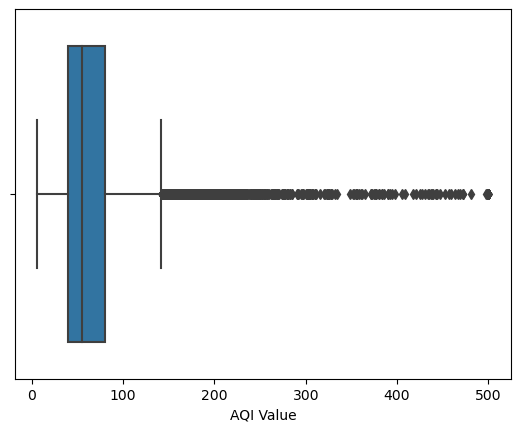

In [16]:
# graph for detecting outliers in the 'AQI Value' column
sns.boxplot(x=df['AQI Value'])
plt.show()

# Assuming you decide to remove outliers beyond the 1.5 * IQR range
Q1 = df['AQI Value'].quantile(0.25)
Q3 = df['AQI Value'].quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[~((df['AQI Value'] < (Q1 - 1.5 * IQR)) | (df['AQI Value'] > (Q3 + 1.5 * IQR)))]


In [46]:
df.sample(50)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
1961,China,Suileng,57,Moderate,1,Good,46,Good,0,Good,57,Moderate
21545,United States Of America,Inkster,154,Unhealthy,4,Good,7,Good,26,Good,154,Unhealthy
17115,Libya,Sabratah,94,Moderate,1,Good,35,Good,1,Good,94,Moderate
729,United States Of America,Kearns,54,Moderate,1,Good,6,Good,14,Good,54,Moderate
6506,Iran (Islamic Republic Of),Rudsar,47,Good,1,Good,43,Good,1,Good,47,Good
10323,India,Shiliguri,132,Unhealthy for Sensitive Groups,4,Good,29,Good,6,Good,132,Unhealthy for Sensitive Groups
23017,Philippines,Koronadal,31,Good,1,Good,17,Good,0,Good,31,Good
14999,Romania,Campulung Moldovenesc,37,Good,1,Good,37,Good,0,Good,34,Good
17702,South Africa,Jan Kempdorp,97,Moderate,3,Good,13,Good,8,Good,97,Moderate
5664,Japan,Ashibetsu,53,Moderate,1,Good,26,Good,4,Good,53,Moderate


In [47]:
denmark_df = df[df['Country'] == 'Denmark']

In [53]:
#search for a sepecific city
denmark_df[denmark_df['City'].str.contains('Arhus')]

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
9960,Denmark,Arhus,33,Good,1,Good,33,Good,1,Good,26,Good


In [48]:
denmark_df2 = final_df[final_df['Country'] == 'Denmark']

In [61]:
filtered_df = denmark_df2[denmark_df2['City'].str.contains('Arhus', case=False, na=False)]

filtered_df.sample()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,...,Confirm attachment/link provided,Boundary of assessment relative to jurisdiction boundary,Year of publication or approval,Factors considered in assessment,Primary author(s) of assessment,Does the city have adaptation goal(s) and/or an adaptation plan?,Population_y,Population Year,City Location_y,Last update
23864,Denmark,Aarhus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,The assessment can be accessed (unrestricted) ...,Same - covers entire jurisdiction and nothing ...,2020.0,A process has been established for prioritizin...,Relevant department within jurisdiction,Adaptation goal(s) and adaptation plan,362235.0,2023.0,POINT (10.1374 56.1684),02/07/2024 04:14:16 AM


In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# We have to convert the data from float to int in order to use pandas to calculate the correlations
numeric_df = df.select_dtypes(include=['float64', 'int64'])


df_cleaned = numeric_df.dropna()
# Calculate the correlation matrix
corr_matrix = df_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Visualizing relationships between all numerical features
sns.pairplot(df_filtered.select_dtypes(include=['float64', 'int64']))
plt.show()


In [ ]:
plt.figure(figsize= (10, 6))

# Plot histograms for all columns in the DataFrame
df.hist()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
plt.xlabel('AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.scatter(df['AQI Value'], df['PM2.5 AQI Value'], color='green')
plt.show()

In [ ]:
sns.distplot(df['AQI Value'],  label='AQI Value', norm_hist=True)  

In [ ]:
sns.distplot(df['PM2.5 AQI Value'],  label='PM2.5 AQI Value', norm_hist=True) 

In [ ]:
# Grouping the data by 'Country' and calculating the mean 'AQI Value' for each country
country_aqi_means = df.groupby('Country')['AQI Value'].mean()

# Sorting the countries by AQI value for better visualization
country_aqi_means = country_aqi_means.sort_values()

# Creating the bar chart
plt.figure(figsize=(15, 25)) 
plt.barh(country_aqi_means.index, country_aqi_means.values, color='skyblue') # Horizontal bar chart
plt.xlabel('Average AQI Value')
plt.ylabel('Country')
plt.title('Average AQI Value by Country')
plt.tight_layout() # Adjusts subplot params so that the subplot(s) fits in to the figure area.

plt.show()

In [ ]:
# Grouping the data by 'Country' and calculating the mean 'PM2.5 AQI Value' for each country
country_pm25_means = df.groupby('Country')['PM2.5 AQI Value'].mean()
# Sorting the countries by PM2.5 AQI value for better visualization
country_pm25_means = country_pm25_means.sort_values()
# Creating the bar chart
plt.figure(figsize=(15, 25))
plt.barh(country_pm25_means.index, country_pm25_means.values, color='skyblue') # Horizontal bar chart
plt.xlabel('Average PM2.5 AQI Value')
plt.ylabel('Country')
plt.title('Average PM2.5 AQI Value by Country')
plt.tight_layout() # Adjusts subplot params so that the subplot(s) fits in to the figure area.
plt.show()


In [ ]:
X = df['AQI Value'].values.reshape(-1, 1)
y = df['PM2.5 AQI Value'].values.reshape(-1, 1)

In [ ]:
# plot all
plt.ylabel('PM2.5 AQI Value')
plt.xlabel('AQI Value')
plt.scatter(X, y, color='blue')
plt.show()

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.15) 

In [ ]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [ ]:
# fit it to our data
myreg.fit(X_train, y_train)
myreg

In [ ]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [ ]:
a

In [ ]:
b

In [ ]:
y_predicted = myreg.predict(X_test)
y_predicted

In [ ]:
y_test

In [ ]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('length')
plt.ylabel('age')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting on the test set
y_pred = myreg.predict(X_test)

# Calculating metrics
print("R^2: ", r2_score(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
#create a scatter plot of the 'AQI Value' and 'PM2.5 AQI Value' columns and color the points by the 'Country' column
fig = px.scatter(df, x='AQI Value', y='PM2.5 AQI Value', color='Country', title='AQI Value vs PM2.5 AQI Value')
fig.show()


In [ ]:
# divide the data into 5 clusters using the KMeans algorithm
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['AQI Value', 'PM2.5 AQI Value']])
df['cluster'] = kmeans.predict(df[['AQI Value', 'PM2.5 AQI Value']])
df.sample(10)



In [ ]:
# create a scatter plot of the 'AQI Value' and 'PM2.5 AQI Value' columns and color the points by the 'cluster' column
fig = px.scatter(df, x='AQI Value', y='PM2.5 AQI Value', color='cluster', title='AQI Value vs PM2.5 AQI Value')
fig.show()


In [ ]:
# Fit the model and predict clusters
kmeans = KMeans(n_clusters=5, random_state=42).fit(df_filtered[['AQI Value', 'PM2.5 AQI Value']])
df_filtered['cluster'] = kmeans.labels_

# Analyze centroids
centroids = kmeans.cluster_centers_
print("Centroids:\n", centroids)

# Plotting clusters and centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='AQI Value', y='PM2.5 AQI Value', hue='cluster', palette='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', label='Centroids')
plt.legend()
plt.show()
